# Setup

In [1]:
import hydra
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as T

from autoencoders.constants import Constants
from autoencoders.modules import WhiteNoise
from autoencoders.utils import plot_images
from autoencoders.data import get_mnist_dataset

constants = Constants()

In [2]:
def get_model(model, config):
    module = hydra.utils.instantiate(config.models[model].module)
    ckpt_path = constants.OUTPUTS.joinpath(config.models[model].ckpt_path)
    return module.load_from_checkpoint(ckpt_path, map_location=torch.device("cpu"))

In [108]:
def show_representation(x):
    fig, ax = plt.subplots(figsize=(6, .3))
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(x[np.newaxis,:], cmap="plasma", aspect="auto")
    plt.show()

## Initialize Hydra Configs

In [28]:
hydra.initialize(config_path='../autoencoders/conf', version_base="1.3")
cfg = hydra.compose(config_name='config')
models_cfg = hydra.compose(config_name='comps')

In [29]:
enc_cfg = hydra.compose(config_name='config', overrides=['model=sidae2', 'data=simsiam'])

/opt/homebrew/Caskroom/miniforge/base/envs/autoencoders/lib/python3.10/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'config': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


# Visualizing Intermediate Representations

In [94]:
dl = hydra.utils.instantiate(enc_cfg.data.train)
batch = next(iter(dl))
aug_1, aug_2 = batch

In [105]:
i = 56

x_1, x_2 = aug_1[i], aug_2[i]

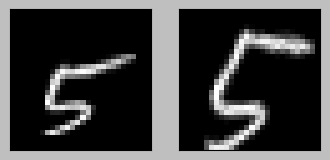

In [106]:
plot_images([x_1.squeeze(), x_2.squeeze()])

In [31]:
mod = get_model('sidae', models_cfg)

/opt/homebrew/Caskroom/miniforge/base/envs/autoencoders/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/opt/homebrew/Caskroom/miniforge/base/envs/autoencoders/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['encoder'])`.
  rank_zero_warn(
/opt/homebrew/Caskroom/miniforge/base/envs/autoencoders/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'decoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['decoder'])`.
  rank_zero_wa

In [107]:
with torch.no_grad():
    z_1, p_1 = mod(aug_1)
    z_2, p_2 = mod(aug_2)

## Comparing Projection of Augment 1 and Latent of Augment 2

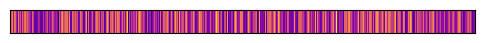

In [112]:
show_representation(p_1[i])

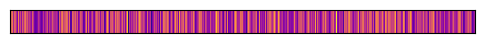

In [122]:
show_representation(z_2[i])

## Comparing Projection of Augment 2 and Latent of Augment 1

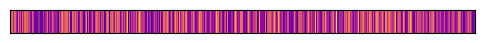

In [109]:
show_representation(z_1[i])

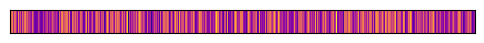

In [110]:
show_representation(p_2[i])

## Comparing Latent Representations

### Same Class

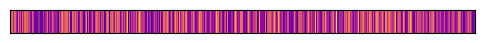

In [109]:
show_representation(z_1[i])

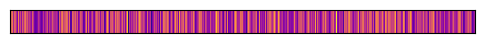

In [111]:
show_representation(z_2[i])

### Different Class

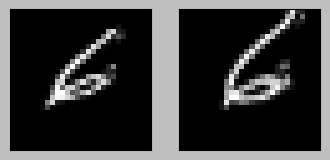

In [116]:
plot_images([aug_1[0].squeeze(), aug_2[0].squeeze()])

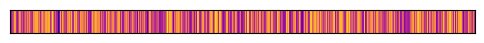

In [114]:
show_representation(z_1[0])

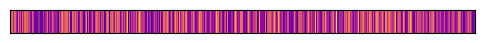

In [109]:
show_representation(z_1[i])

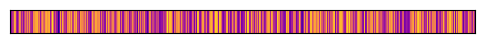

In [113]:
show_representation(p_1[0])

## Comparing Reconstructions

In [117]:
with torch.no_grad():
    rc_1 = mod.decoder(z_1)
    rc_2 = mod.decoder(z_2)

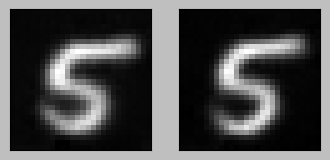

In [120]:
fig.clear()

plot_images([rc_1[i].squeeze(), rc_2[i].squeeze()])

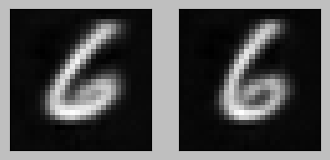

In [121]:
fig.clear()

plot_images([rc_1[0].squeeze(), rc_2[0].squeeze()])